In [25]:
import pandas as pd

In [36]:
member_df = pd.read_excel('./data/会员信息查询.xlsx')
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952714 entries, 0 to 952713
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    952714 non-null  object        
 1   会员等级    952714 non-null  object        
 2   会员来源    952714 non-null  object        
 3   注册时间    952714 non-null  datetime64[ns]
 4   所属店铺编码  952714 non-null  object        
 5   门店店员编码  253828 non-null  object        
 6   省份      264801 non-null  object        
 7   城市      264758 non-null  object        
 8   性别      952714 non-null  object        
 9   生日      785590 non-null  object        
 10  年齡      952705 non-null  float64       
 11  生命级别    952714 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 87.2+ MB


In [37]:
# 会员信息查询
member_df.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡


In [28]:
from datetime import datetime
member_df.loc[:, '注册年月'] = member_df['注册时间'].apply(lambda x: datetime.strftime(x, '%Y-%m'))
member_df.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡,2019-03


In [29]:
month_count = member_df.groupby('注册年月')[['会员卡号']].count()
month_count.head()


,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


In [30]:
# 修改列标签
month_count.columns = ['月增量']
month_count.head()

,月增量
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


In [31]:
month_count = member_df.pivot_table(index='注册年月', values='会员卡号', aggfunc='count')
month_count.head()

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


In [32]:
# 修改列标签
month_count.columns = ['月增量']
month_count.head()


,月增量
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


In [33]:
# 通过 cumsum 对月增量做累积求和
month_count.loc[:, '存量'] = month_count['月增量'].cumsum()
month_count

,月增量,存量
注册年月,,
2017-08,392910,392910
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072
2018-02,13798,429870
2018-03,49320,479190
2018-04,71699,550889


In [34]:
month_count = month_count[1:]
month_count.head()


,月增量,存量
注册年月,,
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072


Text(0.5, 1.0, '会员存量增量分析')

D:\wjh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\wjh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\wjh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 23384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\wjh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\wjh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\wjh\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21592 missing from current font.
  font.set_text(s, 0.0, flags=flags

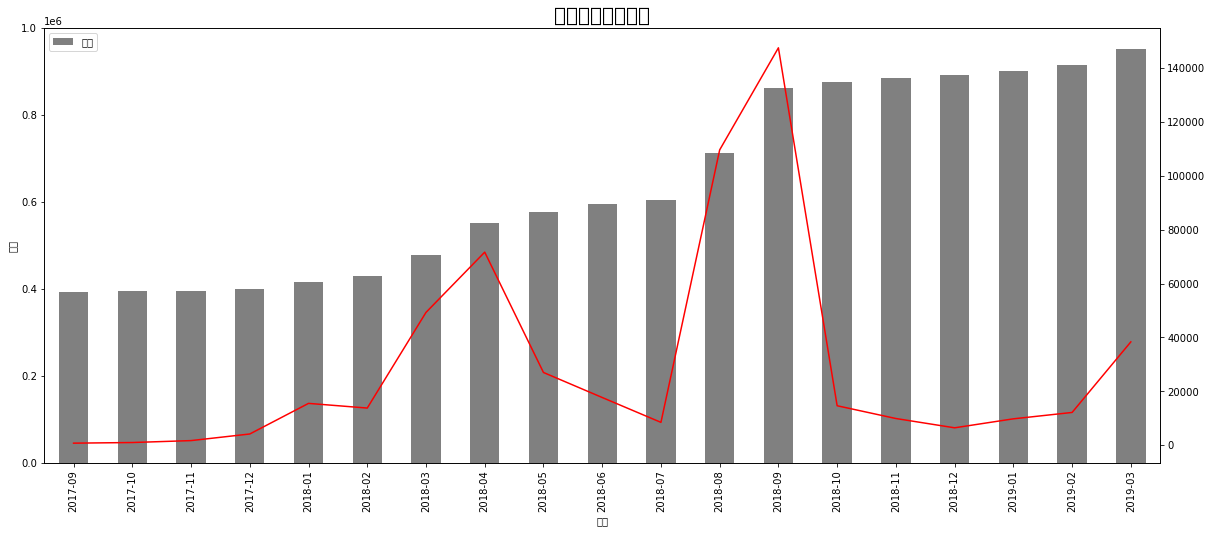

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
# Mac 操作系统设置字体
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'
# Win 操作系统设置字体
# plt.rcParams['font.sans-serif'] = 'SimHei'

month_count['月增量'].plot(figsize=(20, 8), color='red', secondary_y=True)
month_count['存量'].plot.bar(figsize=(20, 8), color='gray', xlabel='年月', ylabel='存量', legend=True)
plt.title('会员存量增量分析', fontsize=20)